In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        print(e)

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224,224] # Lets us set the image size as 224X224
train_path = "Dataset/Train"
test_path = "Dataset/Test"

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [6]:
for layers in vgg.layers:
    layers.trainable = False
    
folder = glob('Dataset/Train/*')

In [7]:
print(len(folder))

3


In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folder),activation='softmax')(x)


In [10]:
model = Model(inputs=vgg.input,outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
                )

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                   zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 300 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [13]:
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=20,
                              verbose=2,
                              steps_per_epoch=len(training_set)/10,
                              validation_steps=len(test_set)/10)

Epoch 1/20
1/1 - 2s - loss: 1.1248 - accuracy: 0.3438 - val_loss: 2.6717 - val_accuracy: 0.3438
Epoch 2/20
1/1 - 1s - loss: 2.6204 - accuracy: 0.3438 - val_loss: 0.7914 - val_accuracy: 0.5625
Epoch 3/20
1/1 - 0s - loss: 0.7062 - accuracy: 0.6250 - val_loss: 1.4927 - val_accuracy: 0.4375
Epoch 4/20
1/1 - 0s - loss: 1.2043 - accuracy: 0.5938 - val_loss: 1.4467 - val_accuracy: 0.3125
Epoch 5/20
1/1 - 0s - loss: 1.4340 - accuracy: 0.3750 - val_loss: 1.0878 - val_accuracy: 0.3750
Epoch 6/20
1/1 - 0s - loss: 1.0387 - accuracy: 0.5833 - val_loss: 0.4825 - val_accuracy: 0.8438
Epoch 7/20
1/1 - 0s - loss: 0.1851 - accuracy: 1.0000 - val_loss: 0.3198 - val_accuracy: 0.9062
Epoch 8/20
1/1 - 0s - loss: 0.1555 - accuracy: 1.0000 - val_loss: 0.3438 - val_accuracy: 0.8750
Epoch 9/20
1/1 - 1s - loss: 0.1544 - accuracy: 0.9375 - val_loss: 0.5478 - val_accuracy: 0.7188
Epoch 10/20
1/1 - 0s - loss: 0.3000 - accuracy: 0.9062 - val_loss: 0.5988 - val_accuracy: 0.6875
Epoch 11/20
1/1 - 0s - loss: 0.5174 - a

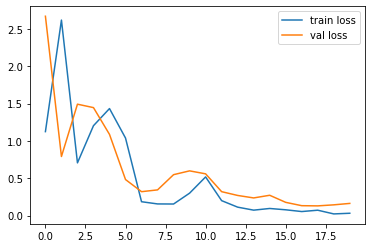

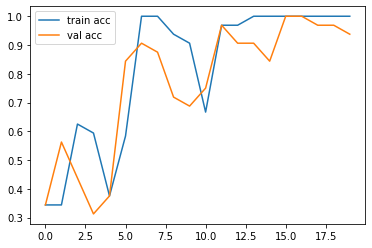

In [14]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [15]:
model.save("My-recognition-model.h5")

In [16]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
   except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [17]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [27]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

def load_image(filename):
    img = load_img(filename, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape(1, 224, 224, 3)
    img = img.astype('float32')
    return img

def run_example(path):
    img = load_image(path)
    # load model
    model = load_model('My-recognition-model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example('C:\\Users\\Aakash Babu\\Pictures\\Camera Roll\\ak.jpg')

[1.0000000e+00 1.6168407e-27 0.0000000e+00]
